# Propane incomplete combustion model

This code is for incomplete combustion of propane - which is main ingridient of LPG. For simplification of problem (propane is available in GRI-mech database, butane not) simulation only with propane will be modelled. Reactor object with Cantera will be prepared to determine the auto-ignition timing of a mixture, and observe changes of temperature, pressure, and content of certain chemical elements in created mixture.

In [359]:
import numpy as np
import cantera as ct
import math
import csv
import matplotlib.pyplot as plt

First, lets create a mixture of gases that are inside of the combustion chamber. As mentioned, I will be using GRI-Mech 3.0, the 53-species, 325-reaction natural gas combustion mechanism, standard for Cantera.

In [442]:
gas1 = ct.Solution('gri30.xml')

A LPG-fueled internal combustion engine obtains energy from the combustion of LPG's various hydrocarbons with oxygen from the ambient air, yielding carbon dioxide and water as exhaust. The incomplete combustion of propane, performs the chemical reaction: 

C 3 H 8 + 4,5 O 2 + 16.92 N 2 ⟶ 2 CO 2 + CO + 4 H 2 O + 16.92 N 2 + Heat

So we need C3H8 and air (O2 and N2 in ratio 1:3.76; air is 21% oxygen and 79% nitrogen, lets obey rest of gases) to react with each other during this process.
I found in internet and literature properties of LPG-air mixture inside of combustion chamber of of four-stroke internal combustion engine - max pressure (shortly before combustion) is around 3MPa.
In theory temperature of propane autoignition is equal to around 490 Celsius degree= 763 K, but this is information for atmosferical pressure which does not occur in that case.
Time of propane combustion should be around 0.001s. Temperature inside of combustion chamber is around 2500-3000 Celsius degree after fuel is burned; initially, before combustion process it should be around 900 Celsius degree.

In [450]:
T = 1200
P = 3000000
X = 'C3H8:1 O2:4.5 N2:16.92' 
gas1.TPX = T,P,X

Lets check properties of created gas:

In [451]:
gas1()


  gri30:

       temperature            1200  K
          pressure           3e+06  Pa
           density         8.87933  kg/m^3
  mean mol. weight         29.5307  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      9.5858e+05        2.831e+07     J
   internal energy      6.2072e+05        1.833e+07     J
           entropy            7599        2.244e+05     J/K
    Gibbs function     -8.1602e+06        -2.41e+08     J
 heat capacity c_p          1387.9        4.099e+04     J/K
 heat capacity c_v          1106.4        3.267e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.200714         0.217488         -25.3049
                N2       0.754683         0.715908         -22.2366
              C3H8       0.044603        0.0666031         -51.3808
     [  +50 minor]        

Now an ideal gas Reactor filled with gas will be created, and the simulation with a ReactorNet object will be prepared

In [452]:
r=ct.Reactor(gas1)
sim=ct.ReactorNet([r])

Arrays to hold the data for plots

In [453]:
times = np.zeros(1000)
data = np.zeros((1000,5))

EndTime&StartTime and timestep of simulation:

In [454]:
time=0
tf = 0.005
dt=tf/1000
n=0

Loop for calculation:

In [455]:
for n in range(1000):
    time += dt
    sim.advance(time)
    times[n] = time
    data[n,0] = r.T
    data[n,1] = r.thermo.P
    data[n,2:]=r.thermo['O2', 'H' , 'C3H8'].X

Now plots of calculations will be printed out. Firstly plot for Temperature vs time:

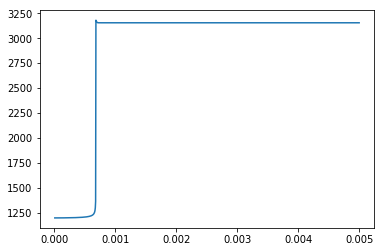

In [456]:
plt.plot(times,data[:,0])
plt.show()

In [461]:
print(data[999,0])

3154.2196473805398


Plot for pressure vs time:

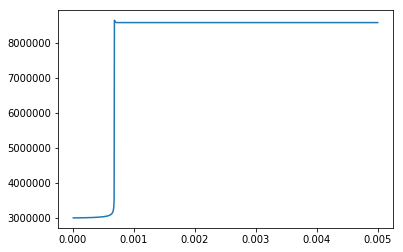

In [457]:
plt.plot(times,data[:,1])
plt.show()

In [462]:
print(data[999,1])

8583751.465170465


Plot for O2 content vs time:

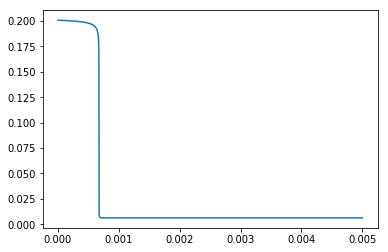

In [458]:
plt.plot(times,data[:,2])
plt.show()

In [463]:
print(data[999,2])

0.006160168434464259


Plot for H content vs time:

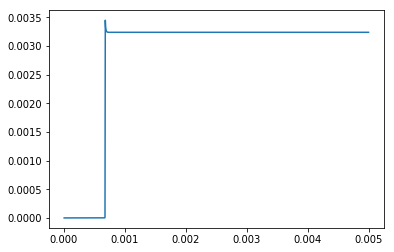

In [459]:
plt.plot(times,data[:,3])
plt.show()

In [464]:
print(data[999,3])

0.0032363493734964242


Plot for C3H8 content vs time:

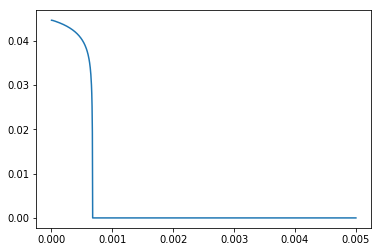

In [460]:
plt.plot(times,data[:,4])
plt.show()

In [465]:
print(data[999,4])

1.6132557885400097e-33
